<img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Other/logoBocconi.png">

$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

# Training module on network analysis
## Topics covered:
1. **Overview** of networks and relevant fields of applications  
2. Types of networks and their **mathematical representation**
3. General discussion of recurring network **properties**
4. **Descriptive analyses** of networks via global and local summary measures 
5. **Graphical representation** of networks via force-directed placement algorithms
6. Identifying network **communities** via optimization algorithms
7. Analysis of networks in **Python** via **NetworkX** (https://networkx.org/)

- **SUGGESTED BOOK**: *Network Science* by Albert-László Barabási (http://networksciencebook.com/). Some examples and figures in this module are taken from such a book.

In [2]:
# some graphical settings and libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]

In this module we will see a highly fascinating, relevant and timely example of **unsupervised learning**, namely the analysis of **networks**. 

In the Oxford Dictionary, **networks** are defined as a *collection of interconnected things*. More specifically, we can think of a network as a system of connections, which we will call **edges**, that encode  relationships information (e.g., proximity, interaction, similarity,  etc $\ldots$) among a set of entities, which we will call **nodes** (e.g., people, objects, devices, etc $\ldots$).

The above definition already clarifies why networks are so important **sources of information** and knowledge nowadays, both in **science** and in **industry** (there are about $3.160.000.000$ results if you search for the word *network* in Google). Indeed, we live in a highly interconnected world: according to the sociological theory of the **Six Degrees of Separation** all people in the world are (on average) six, or fewer, social connections away from each other. 

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/9/94/Six_degrees_of_separation.png" width="530" height="400"></center>

Let's have a look at a real example focusing on the degrees of separation in the **network among actors** (where an edge between two actors is present if they co-participated at least once in the same film): https://oracleofbacon.org/. I'll focus here on **Odysseas Papaspiliopoulos**. 

Before studying more in detail several network analysis techniques, let's first watch a **TEDx** talk (titled **"La Geometria delle Relazioni"**) that I gave on *network science*. In this talk, I also provide some intuitions for several concepts we will formalize later on in this module.

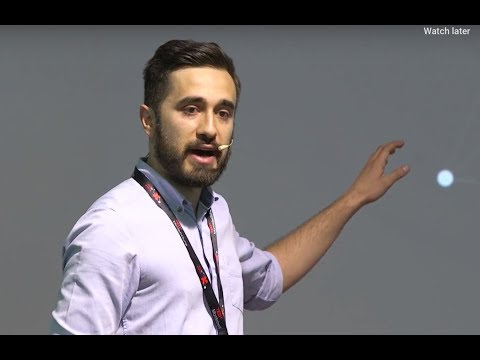

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('mcHz_ycaC6Q', height= 600,width=1000)

## Examples of networks

Networks often appear in several fields. Key examples are:

- **Technological** networks (e.g., world-wide web, air transportation networks, $\ldots$)
- **Biological** networks (e.g., brain networks, human disease network, $\ldots$)
- **Information** networks (e.g., co-citation networks in scientific journals, $\ldots$)
- **Social** networks (e.g., Facebook, Twitter, offline interaction networks, $\ldots$)

These are, of course, just the main examples. Networks appear often also in other disciplines (e.g., management, finance, sport, crime, etc $\ldots$).

Below you can see a very interesting graphical representation of the **human disease network** where nodes are human diseases and edges denote presence or absence of a common genetic origin.

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/hdn.png"  width="700" height="550"></center>

Before moving to Python implementations, let's see also an **example in management** taken from the book *Network Science*. This example is motivated by the fact that, while  management tends to rely on official command chains, it is increasingly evident that the informal network, capturing who really communicates with whom, plays the most important role in the success of an organization.

In the figure below, you can see the employees of a Hungarian company with three main locations (purple, yellow and blue). In this company, the management realized that **information reaching the workers about the intentions of the higher management often had nothing do to with their real plans**.

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/m1.png" width="700" height="410"></center>

To address the problem previously discussed, the management decided to enhance information flow in the company by analyzing in detail the **informal network**, which comprises information about whom employees  turn to for advice when it comes to decisions impacting the company. 

To collect these data, the company developed an online platform to ask each employee to whom do they turn to for advice when it comes to decisions. This platform provided a network (see below) where two individuals are connected if one nominated the other as his/her source of information on organizational and professional issues.

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/m2.png" width="700" height="410"></center>

In the two figures below we can clearly see how, even a simple analysis of such a network, can provide important knolwedge for the company to improve information flow. More specifically:

- **Figure [c]**: Nodes are colored based on their rank within the company. Note that none of the directors (red) and top managers (blue) are hubs. The biggest hub, hence the most influential individual, is an ordinary employee.
- **Figure [d]**: The links of the largest hub (red) and those two links away from this hub (orange). The **hub is the employee in charge of safety/environmental issues**. He regularly visits each location and  is **connected to everyone except the top management**. With few knowledge of the true intentions of the management, he passes on information that he collects along his trail.

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/m3.png" width="1000" height="310"></center>

The above example shows how a careful analysis and visualization of network data can provide extremely important insights on the **structure and functioning of organizations**, while informing also on **possible interventions**. In this module we will see in detail (both in theory and in practice) how to implement these analyses through descriptive methods, data-visualization strategies and algorithmic solutions.


## Mathematical representation of networks and recurring properties

Networks can be generally classified based on the **directionality** of the edge and on its measure of **strength**.

<ul type="disc">
  <li>Directionality.</li>
    <ul>
      <li>Undirected: There is no directionality in the relationship (e.g., friendship on Facebook)</li>
      <li>Directed: There is a directionality in the relationship (e.g., likes on Facebook)</li>
    </ul>
  <li>Strenght.</li>
    <ul>
      <li>Binary: Only presence (1) or absence (0) of a relationship is monitored (e.g., friendship on Facebook)</li>
      <li>Weighted: Also the strength of the relationship is measured (e.g., tags on Facebook)</li>
    </ul>
</ul>

The methods required to analyze the above networks change depending on the type of edges monitored. We will focus here on **binary** (presence or absence of a connection) **undirected** (no directionality) **networks**.

To understand how these networks can be mathematically represented, let's first create our first network in Python. This requires the library **NetworkX** which we will use throughout the whole module.

In [4]:
# import NetworkX and other useful libraries for data analysis
import networkx as nx
import numpy as np
import pandas as pd

Let us start by producing an **empty network**. 

In [5]:
g = nx.Graph() # empty network

Once this has been done, we can start **adding nodes and edges** via the following commands.

In [6]:
g.add_node(1) # add node 1
g.add_nodes_from([2, 3, 4, 5]) # add nodes 2, 3, 4 and 5

In [7]:
g.add_edge(1, 2) # add an edge between nodes 1 and 2
g.add_edges_from([(1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]) # add the other edges 

Let us now **represent graphically** the network we have constructed.

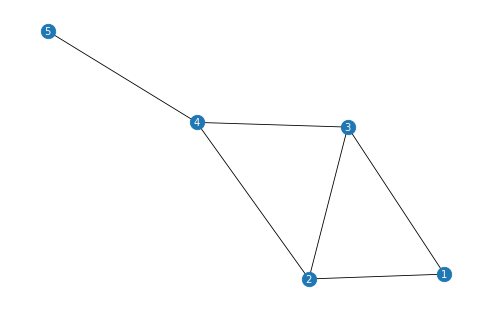

In [8]:
plt.rcParams['figure.dpi'] = 60 # set image dimension
nx.draw(g, with_labels=True, font_color="snow") # display the simple network

We can also obtain some **general information** on *g* as follows.

In [9]:
print(nx.info(g))

AttributeError: ignored

The above network can be mathematically represented in two different ways. 

The first one is through a **Graph** $\mathcal{G}=(\mathcal{V},\mathcal{E})$. This is an object made by two sets: The **set of nodes** $\mathcal{V}=\{1, \ldots, n \}$ which lists all the nodes in the network, and the **set of edges** $\mathcal{E} \subseteq \{\{i, j \}: i,j \in \mathcal{V}, i > j \}$ which collects all the observed edges in the network (where an **edge** is formally defined as a pair $\{i, j \}: i,j \in \mathcal{V}$). Let's obtain these two sets for the network we created.

In [10]:
g.nodes() # nodes set

NodeView((1, 2, 3, 4, 5))

In [11]:
g.edges() # edges set

EdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

Alternatively, we can represent the network via an **Adjacency Matrix** $A$. This an $n \times n$ matrix (symmetric for undirected networks) where nodes are placed on rows and columns and the generic entry $A_{ij}=A_{ji}$ is defined as $A_{ij}=A_{ji}=1$ if $\{i, j \} \in \mathcal{E}$, $0$ otherwise.

In [12]:
print(nx.to_numpy_matrix(g)) # adjacency matrix

AttributeError: ignored

Before moving on with the analysis of the simple network we created above, let us also load the **real-world network** we will analyse throughout this module.

In [13]:
from urllib import request
remote_url = 'http://tommasorigon.github.io/DataScienceCourse/Data/real_net.graphml'
local_file = 'real_net.graphml'
request.urlretrieve(remote_url, local_file)

g_real = nx.read_graphml("real_net.graphml") # load real-world network
print(nx.info(g_real)) # view some information

AttributeError: ignored

This is a reald-network among $655$ **people**, which also contains a **node attribute** ($y$) denoting membership to a group. Let's view part of the node set $\mathcal{V}$ and edge set $\mathcal{E}$ of such a network. 

In [14]:
list(g_real.nodes(data=True))[1:10] # view some nodes

[('n1', {'name': '2', 'y': 9.0}),
 ('n2', {'name': '3', 'y': 4.0}),
 ('n3', {'name': '4', 'y': 8.0}),
 ('n4', {'name': '5', 'y': 9.0}),
 ('n5', {'name': '6', 'y': 3.0}),
 ('n6', {'name': '7', 'y': 8.0}),
 ('n7', {'name': '8', 'y': 8.0}),
 ('n8', {'name': '9', 'y': 6.0}),
 ('n9', {'name': '10', 'y': 4.0})]

In [15]:
list(g_real.edges(data=True))[1:10] # view some edges

[('n0', 'n42', {}),
 ('n0', 'n125', {}),
 ('n0', 'n158', {}),
 ('n0', 'n199', {}),
 ('n0', 'n202', {}),
 ('n0', 'n282', {}),
 ('n0', 'n337', {}),
 ('n0', 'n487', {}),
 ('n0', 'n591', {})]

Below we also extract the vector containing the **attribute** value of the different nodes. 

In [16]:
group_labels = nx.get_node_attributes(g_real,'y') # extract node attribute
print(group_labels) # visualize node attribute

{'n0': 1.0, 'n1': 9.0, 'n2': 4.0, 'n3': 8.0, 'n4': 9.0, 'n5': 3.0, 'n6': 8.0, 'n7': 8.0, 'n8': 6.0, 'n9': 4.0, 'n10': 8.0, 'n11': 8.0, 'n12': 8.0, 'n13': 6.0, 'n14': 4.0, 'n15': 8.0, 'n16': 8.0, 'n17': 7.0, 'n18': 10.0, 'n19': 8.0, 'n20': 8.0, 'n21': 8.0, 'n22': 6.0, 'n23': 4.0, 'n24': 6.0, 'n25': 8.0, 'n26': 8.0, 'n27': 9.0, 'n28': 6.0, 'n29': 6.0, 'n30': 8.0, 'n31': 8.0, 'n32': 8.0, 'n33': 4.0, 'n34': 8.0, 'n35': 8.0, 'n36': 9.0, 'n37': 8.0, 'n38': 8.0, 'n39': 9.0, 'n40': 6.0, 'n41': 9.0, 'n42': 2.0, 'n43': 9.0, 'n44': 8.0, 'n45': 7.0, 'n46': 5.0, 'n47': 8.0, 'n48': 8.0, 'n49': 6.0, 'n50': 4.0, 'n51': 8.0, 'n52': 8.0, 'n53': 10.0, 'n54': 8.0, 'n55': 8.0, 'n56': 8.0, 'n57': 3.0, 'n58': 9.0, 'n59': 8.0, 'n60': 8.0, 'n61': 7.0, 'n62': 7.0, 'n63': 8.0, 'n64': 3.0, 'n65': 8.0, 'n66': 8.0, 'n67': 8.0, 'n68': 3.0, 'n69': 7.0, 'n70': 3.0, 'n71': 3.0, 'n72': 10.0, 'n73': 8.0, 'n74': 8.0, 'n75': 3.0, 'n76': 10.0, 'n77': 10.0, 'n78': 6.0, 'n79': 6.0, 'n80': 10.0, 'n81': 8.0, 'n82': 6.0, 'n83': 

Let us now see a **first graphical representation** of this network, coloring nodes according to the group membership attribute. 

In [17]:
color_map = [] # define the colors according the value of node attribute
for node in g_real:
    if group_labels[node]==1:
        color_map.append('grey')
    elif group_labels[node]==2: 
        color_map.append('cornsilk') 
    elif group_labels[node]==3: 
        color_map.append('blue')
    elif group_labels[node]==4: 
        color_map.append('snow') 
    elif group_labels[node]==5: 
        color_map.append('green')
    elif group_labels[node]==6: 
        color_map.append('yellow') 
    elif group_labels[node]==7: 
        color_map.append('lightblue')
    elif group_labels[node]==8: 
        color_map.append('red') 
    elif group_labels[node]==9: 
        color_map.append('orange')         
    else:
        color_map.append('purple') 

**COMMENT**: As currently displayed, this figure provides
few information about the structure and properties of the network we are studying.
Our goal will be to uncover these structures and properties via **statistical analyses of networks**.

*But which properties should we study?* 

- **Small world**: nodes are not all tightly connected, but each node can be connected to any other in the network by a path through a low number of edges.
- **Scale free**: incoming nodes tend to connected with hubs, rather than with nodes having few connections (*rich gets richer*).
- **Homophily**: nodes tend to connect preferably with others having similar characteristics; e.g., preferences, age, geographic location, $\ldots$ (*love the same*).
- **Communities**: nodes tend to form groups with dense within connectivity and relatively few connections across groups.
- **Hubs**: networks often display (relatively few) hubs, namely nodes with much higher edges than the others (important for small world).

From now on, we will see several **quantitative measures**, **data-visualization strategies** and **algorithmic solutions** (along with their implementation in **NetworkX**) to check the above properties for a given network.

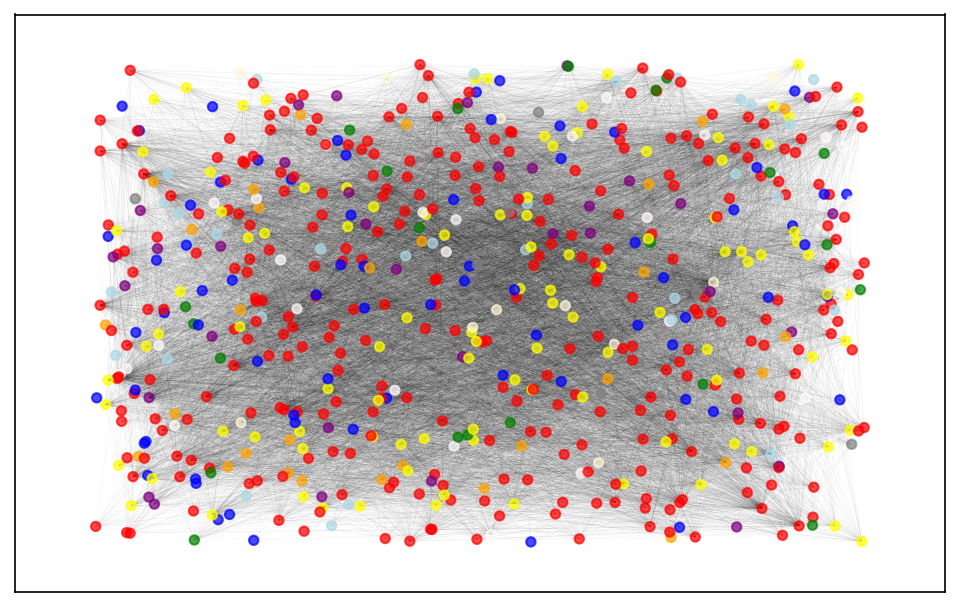

In [18]:
plt.rcParams['figure.dpi'] = 150 # set image dimension
pos = nx.random_layout(g_real) # obtain node positions
nx.draw_networkx_edges(g_real, pos, width=0.1, alpha=0.1) # display edges
nx.draw_networkx_nodes(g_real, pos, node_size=20, alpha=0.7, node_color=color_map) # display nodes
plt.show()

## Descriptive analyses of networks via global and local summary measures

We saw, in the *small world* and when speaking about *degrees of separation*, that the possibility of connecting nodes through paths across edges is a key in networks. This concept is formalized by the analysis of **paths** and **shortest paths**.

- **Path**: For each pair of nodes $i$ and $j$, a path is a sequence of serially connected nodes which allow to connect $i$ with $j$.
- **Shortest Path**: For each pair $i$ and $j$, a shortest path is the smallest sequence of serially connected nodes required to connect $i$ with $j$.

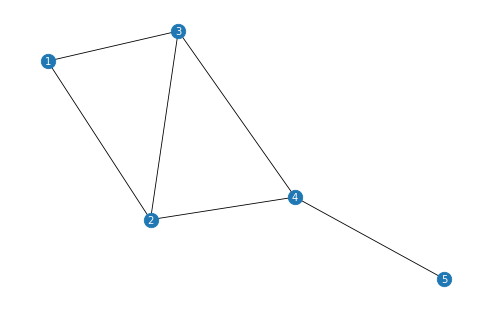

In [19]:
plt.rcParams['figure.dpi'] = 60 # set image dimension
nx.draw(g, with_labels=True, font_color="snow") # display the simple network

There can be multiple shortest paths. In the simple network we generated previously (see figure above), the shortest paths between $1$ and $5$ are $\{1; 2; 4; 5\}$ and $\{1; 3; 4; 5\}$. The number of edges forming a shortest path is called **shortest path length** or, also, **geodesic distance**. In the simple network displayed above, the geodesic distance between nodes $1$ and $5$ is $3$. Let's compute them in NetworkX.

In [20]:
nx.shortest_path(g,1,5) # one shortest path from 1 to 5

[1, 2, 4, 5]

In [21]:
nx.shortest_path_length(g,1,5) # length of the shortest path from 1 to 5

3

Let us now compute the shortest paths lengths $s_{ij}$ for each pair of nodes $\{i,j\}$ in the simple network we generated.

In [22]:
lengths = nx.all_pairs_shortest_path_length(g) # compute all shortest path lengths
lengths = dict(lengths) # create a dictionary and display it
lengths

{1: {1: 0, 2: 1, 3: 1, 4: 2, 5: 3},
 2: {2: 0, 1: 1, 3: 1, 4: 1, 5: 2},
 3: {3: 0, 1: 1, 2: 1, 4: 1, 5: 2},
 4: {4: 0, 2: 1, 3: 1, 5: 1, 1: 2},
 5: {5: 0, 4: 1, 2: 2, 3: 2, 1: 3}}

We can also summarize the above lengths into a single global indicator, measuring how many edges we need, on average, to connect any two nodes in the network. This is called **averaged shortest path length** and is defined as $L=\sum_{(i,j): i \neq j} s_{ij}/[n(n-1)]$.


In [23]:
nx.average_shortest_path_length(g) # compute averaged shortest path length

1.5

Quantifying the *importance* of each node within the network is fundamental, especially for identifying **hubs** and other **central nodes**. This is done via different summary statistics computed for every node.

- **Degree** of node $i$. Number of nodes with whom $i$ is connected:  $d_i=\sum_{j=1}^n A_{ij}$.
- **Betweenness** of node $i$. Sum (over all pair of nodes $j$ and $w$ different from $i$) of the relative frequencies of shortest paths among $j$ and $w$ that pass through $i$:  $g_i=\sum_{j \neq i \neq w}n_{jw}(i)/n_{jw}$.
- **Closeness centrality** of node $i$. Inverse of the sum of the geodesic distances of node $i$ from all the others: $c_i=1/\sum_{j \neq i} s_{ij}$.

Other interesting measures are **local clustering coefficient**, **eigenvector centrality** and **PageRank centrality**, etc $\ldots$. Let's compute the above quantities for our simple network.

In [24]:
nx.degree(g) # degree

DegreeView({1: 2, 2: 3, 3: 3, 4: 3, 5: 1})

In [25]:
nx.betweenness_centrality(g,normalized=False) # betweenness

{1: 0.0, 2: 1.0, 3: 1.0, 4: 3.0, 5: 0.0}

In [26]:
nx.closeness_centrality(g) # closeness

{1: 0.5714285714285714, 2: 0.8, 3: 0.8, 4: 0.8, 5: 0.5}

It is also important to study and quantify the architecture of the network as a whole. This is done via **summary statistics computed for the whole network**.

- **Density**. Relative frequency of observed edges over the total possible number  of edges: $D=\sum_{(i,j)} A_{ij}/[n(n-1)]$.
- **Diameter**. Length of the longest shortest path: $S=max_{(i,j)}\{s_{ij}\}$.
- **Clustering coefficient**. Number of closed triplets over the total number of triplets (open and closed): $C=3\cdot n_{\tiny{triangles}}/n_{\tiny{triplets}}$.

Other key measures are the **averaged shortest path length** (we already saw), etc $\ldots$. Let's compute such quantities for our simple network.

In [27]:
nx.density(g) # network density

0.6

In [28]:
nx.diameter(g) # network diameter

3

In [29]:
nx.transitivity(g) # clustering coefficient (also known as transitivity)

0.6

As we previously mentioned, **homophily** (i.e., the tendency of nodes to connect preferably with others having similar characteristics) is a key property in networks. Therefore, quantifying the degree of homophily in a network, with respect to a certain node attribute, is fundamental to understand how specific characteristics influce the formation of connections. **Modularity** and **assortativity** are the most commonly used measures of homophily.

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/modularity.png" width="870" height="210"></center>

- **Modularity**. Difference between the fraction of edges connecting nodes with the same attribute and the expected value of this quantity for a network where edges are formed fully randomly: $Q=\sum_{k=1}^K e_{kk}-\sum_{k=1}^K a_{k}^2$. 
- **Assortativity**. Normalized modularity: $R=(\sum_{k=1}^K e_{kk}-\sum_{k=1}^K a_{k}^2)/(1-\sum_{k=1}^K a_{k}^2)$.

Let's compute such quantities for our simple network.

In [30]:
# define the nodes attribute
g.nodes[1]['attr']=1
g.nodes[2]['attr']=1
g.nodes[3]['attr']=1
g.nodes[4]['attr']=2
g.nodes[5]['attr']=2

In [31]:
nx.attribute_assortativity_coefficient(g,'attr') # assortativity

0.24999999999999975

In [32]:
nx.algorithms.community.modularity(g,[{1,2,3},{4,5}]) # modularity

0.11111111111111113

Now that we have seen how to compute relevant summary measures for a specific network, let us go back to our original **real-world network** and apply to it what we have learned so far. In particular, as a first step we compute the **degrees** and **betweennesses** of its nodes and study their distribution by means of an histogram.

Text(0, 0.5, 'Number of Nodes')

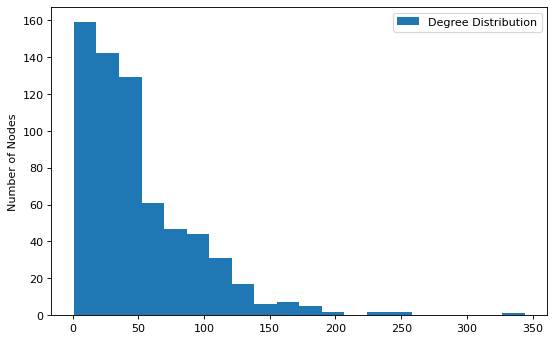

In [33]:
plt.rcParams['figure.dpi'] = 80 # set image dimension

degree = nx.degree(g_real) # compute the degree of nodes

# plot the histogram
degree_list =[] 
for (n,d) in degree:
  degree_list.append(d)

plt.hist(degree_list, label='Degree Distribution', bins=20)
plt.legend()
plt.ylabel('Number of Nodes')

Text(0, 0.5, 'Number of Nodes')

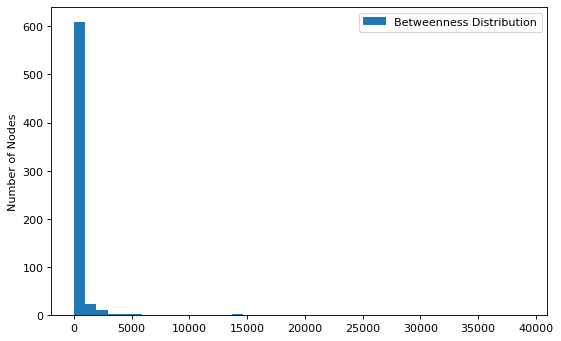

In [34]:
betw = nx.betweenness_centrality(g_real,normalized=False) # compute the betweenness of nodes

# plot the histogram
plt.hist(betw.values(), label='Betweenness Distribution', bins=40)
plt.legend()
plt.ylabel('Number of Nodes')

**COMMENT**: The **degree distribution** and the **betweenness distribution** seem to have a power law behavior (i.e., $\approx x^{-\gamma}$). Hence, the network seems to display a **scale free** property. In addition, there are some (few) **hubs** with a particularly high degree and notable betweenness. Let's also compute some global summary measures, to check the **small world** property.

In [35]:
nx.density(g_real) # network density

0.07620981861474893

In [36]:
nx.transitivity(g_real) # clustering coefficient (also known as transitivity)

0.359369151869259

In [37]:
nx.average_shortest_path_length(g_real) # averaged shortest path length

2.17985853351075

**COMMENT**: The **density** $D$ is low, and therefore nodes are not all tightly connected. However, the **averaged shortest path length** $L$ is also relatively small, meaning that, on average, any pair of nodes can be connected by a walk through $\approx 2$ edges. In addition, the  **clustering** $C$ is higher than $0$, and hence the network also shows a tendency to cluster locally (high proportion of triangles). Hence, this network is reasonably **small world**.

*Is there also homophily with respect to the group attribute?*. Let's check this by computing, for example, the **assortativity**.

In [38]:
nx.attribute_assortativity_coefficient(g_real,'y') # assortativity

0.6553349660003133

**COMMENT**: There seems to be **homophily** with respect to the attribute analyzed.

## Graphical representation of networks

The figure below shows a poor (left) and a highly informative (right) **graphical representation** of the real-world network we analyzed so far.

<img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/net_graph.png" width="1000" height="440">

As you can see above, a well-represented network can provide fundamental insights on its properties and structures (e.g., homophily, communities, hubs, etc $\ldots$). *But how can we represent it in practice to obtain these insights?*

We could "simply" set:

- **Node size**: Proportional to degree or betweenness (*hubs*)
- **Node color/shape**: Related to the value of the node attribute (*homophily*)
- **Node position**: Tightly connected nodes should be closer in the space, while unconnected ones should appear far apart (*communities*)  

However, note that identifying nodes' positions is not a straightforward task, since the induced distances should be coherent with the geodesic ones (which are different from the concept of Euclidean distances we are used to). Luckily, there are very clever algorithms (**force-directed placement algorithms**) which solve this problem by approaching networks from a **Physics perspective**: Network is seen as a **system of particles with energies**.

More specifically, these algorithms find nodes' positions by interpreting the network as a physics system of **charged particles** (nodes) and **springs** (edges). As a result, this system has a **total energy** (which measures how much the system is stable) that depends on two forces.

- **Repulsive**: It acts on all nodes and generates high energy when nodes are very close to each other (similar to *Coulomb law*).
- **Attractive**: It acts on connected nodes and generates high energy when two connected nodes are far apart (similar to *Hooke law*).

**High energy systems** are those for which disconnected nodes are close and connected nodes are far apart. **Low energy systems** are those for which connected nodes are close and disconnected nodes are far apart. Hence, these algorithms look for the node positions which minimize the energy.

Let's have a look at two illustrative videos. **Video 1** is a simple example which clarifies how the **force-directed placement algorithm** works. **Video 2** shows the potentials of such an algorithm when applied to the **airports network** where each node is an airport and an edge between two airports indicates presence of at least one direct flight among them.

<img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/example_videos.png" width="1000" height="300">

These videos are obtained from the software **Gephy**: one of the leading softwares for the descriptive analysis and visualization of networks. You can download it and check how it works at https://gephi.org/ (there are a number of  useful tutorials in the website).

Since our focus is on **Python**, let's implement these **force-directed placement algorithms** in **Python**, considering our real-world network.

In [39]:
pos = nx.spring_layout(g_real, iterations=200, k=0.7) # obtain node positions via force-directed placement
list_degree = list(g_real.degree())  # obtain node degrees
nodes , degree = map(list, zip(*list_degree)) # create a mapping for defining the size of nodes based on degree

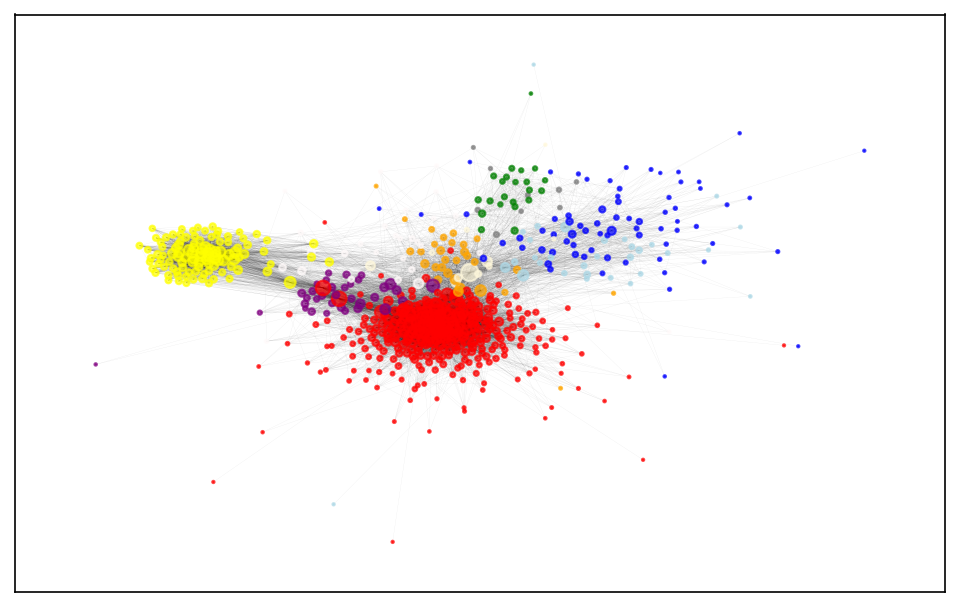

In [40]:
plt.rcParams['figure.dpi'] = 150 # set image dimension
nx.draw_networkx_edges(g_real, pos, width=0.1, alpha=0.1) # display edges
nx.draw_networkx_nodes(g_real, pos, node_size=[(v * 0.2)+1 for v in degree], alpha=0.7, node_color=color_map) # display nodes
plt.show()

**COMMENT**: If we compare this graphical representation with the one we obtained at the very beginning of this module, it is clear that such an improved representation tells us a lot more about the structure of the network we are analyzing. More specifically:

- There are **communities** (groups of nodes tightly interconnected within and with relatively few connections across groups).
- These commnunities mostly overlap with the group attribute (defined by the color). Hence, there is evidence of **homophily**.
- Some communities (e.g., yellow and red) are more **dense** than others (e.g., blue).
- The relative proximity among communities is also informative of their macro-interactions. For example, there seems to be **at least three main poles** (yellow, red-purple-orange, blue-green-lightblue-gray).
- There are key **hub nodes** in this network, especially those who create bridges among different communities.

Let's also see the whole video (**Video 3**) clarifying how the **force-directed placement algorithm** finds the final configuration shown above (made with **Gephy** https://gephi.org/).

<center><img src = "https://tommasorigon.github.io/DataScienceCourse/Images/Networks/real_net_videos.png" width="800" height="500"></center>

## Community detection

As we have seen above, **communities** are often present in networks. As you can see in the figure below, **communities** are **groups of nodes** with  **dense  within connectivity**  and relatively  **few connections across** groups.

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Network_Community_Structure.svg/440px-Network_Community_Structure.svg.png" width="330" height="340"></center>

*But how can we identify these groups in practice?*

The are several possible solutions:
- **Girvan-Newman algorithm** (based on edge betweenness)
- **Louvain algorithm** (modularity optimization)
- **Stochastic block models** (model-based approach)
- and others $\ldots$

In this module, we will focus on the **Louvain algorithm** since it is one of the most popular. This strategy finds communities through an iterative procedure which cicles between 6 main steps.

1. Start with **all the nodes in their own community** (one node for each cluster)  
2. For each node $i$, **compute the change in modularity** $\Delta Q_{i \rightarrow C_j}$, when moving node  $i$ from its community to the one of every node $j$ connected to $i$
3. **Assign node $i$** to the community for which the change in modularity is the highest, if the change is positive. If negative,  $i$ remains in its original community
4. **Repeat steps 2. and 3.** iteratively and sequentially for all nodes $i=1, \ldots, n$, until there are no more increments in modularity  
5. Group the communities to **form a new weighted network** (with self-loops) where each community is a node and the edges measure the total number of  connections within and between communities 
6.  Go back to step 2. and **replicate** the subsequent steps to this new network

The above steps are summarized in the figure below (**source**: Blondel, Guillaume, Lambiotte, and Lefebvre. "Fast unfolding of communities in large networks". *J. Stat. Mech. Theory Exp*. https://doi.org/10.1088/1742-5468/2008/10/P10008 (2008).)

<center><img src = "https://miro.medium.com/max/1400/1*iXJYk4DOM7JQ6o486kCIcg.png" width="790" height="450"></center>


Let us now go back to our real-world network and perform community detection via the **Louvain algorithm**.

In [41]:
# If you need to install this package, please run on the terminal
# conda install -c conda-forge python-louvain
from community import community_louvain # import function for Louvain community detection
partition = community_louvain.best_partition(g_real) # run the algorithm and obtain communities

In [42]:
print(partition) # visualize community assignments

{'n0': 1, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 1, 'n5': 1, 'n6': 3, 'n7': 3, 'n8': 0, 'n9': 1, 'n10': 3, 'n11': 3, 'n12': 3, 'n13': 0, 'n14': 0, 'n15': 3, 'n16': 3, 'n17': 1, 'n18': 2, 'n19': 1, 'n20': 3, 'n21': 3, 'n22': 0, 'n23': 0, 'n24': 0, 'n25': 3, 'n26': 3, 'n27': 1, 'n28': 0, 'n29': 0, 'n30': 3, 'n31': 3, 'n32': 3, 'n33': 3, 'n34': 3, 'n35': 3, 'n36': 1, 'n37': 3, 'n38': 3, 'n39': 1, 'n40': 0, 'n41': 1, 'n42': 1, 'n43': 1, 'n44': 3, 'n45': 1, 'n46': 1, 'n47': 3, 'n48': 3, 'n49': 0, 'n50': 1, 'n51': 3, 'n52': 3, 'n53': 2, 'n54': 3, 'n55': 3, 'n56': 3, 'n57': 1, 'n58': 1, 'n59': 3, 'n60': 3, 'n61': 1, 'n62': 1, 'n63': 3, 'n64': 1, 'n65': 3, 'n66': 3, 'n67': 3, 'n68': 1, 'n69': 1, 'n70': 1, 'n71': 1, 'n72': 2, 'n73': 3, 'n74': 3, 'n75': 1, 'n76': 2, 'n77': 2, 'n78': 0, 'n79': 0, 'n80': 2, 'n81': 3, 'n82': 0, 'n83': 3, 'n84': 1, 'n85': 3, 'n86': 2, 'n87': 1, 'n88': 1, 'n89': 1, 'n90': 3, 'n91': 1, 'n92': 1, 'n93': 3, 'n94': 0, 'n95': 3, 'n96': 3, 'n97': 1, 'n98': 0, 'n99': 1, 'n100': 3

In [43]:
df = pd.DataFrame(partition.values(),columns=['partition']) # transform into a dataframe
absolute_frequencies = df['partition'].value_counts() # compute community sizes
print(absolute_frequencies) # display community sizes

3    294
1    208
0    109
2     44
Name: partition, dtype: int64


**COMMENT**: The algorithm finds **four communities**, with the first three containing most of the nodes. Let's represent them graphically by visualizing the network as we did before (i.e., using force-directed placement), but now the **node colors correspond to the communities** we indentified and not to the original group attribute.

In [44]:
color_map_new = [] # define the colors according the community labels
for node in g_real:
    if partition[node]==1:
        color_map_new.append('blue')
    elif partition[node]==2: 
        color_map_new.append('yellow') 
    elif partition[node]==3: 
        color_map_new.append('red')     
    else:
        color_map_new.append('purple') 

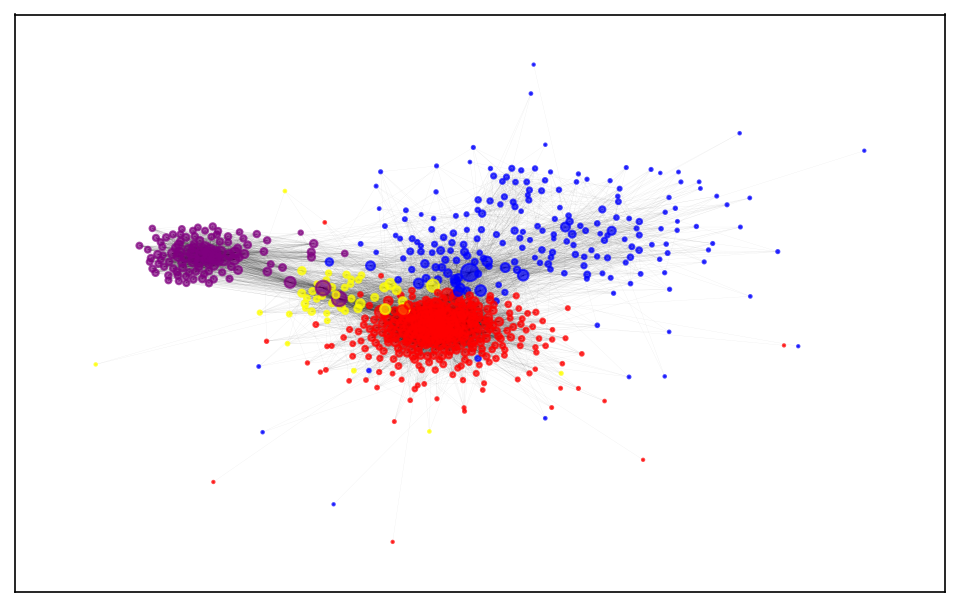

In [45]:
plt.rcParams['figure.dpi'] = 150 # set image dimension
nx.draw_networkx_edges(g_real, pos, width=0.1, alpha=0.1) # display edges
nx.draw_networkx_nodes(g_real, pos, node_size=[(v * 0.2)+1 for v in degree], alpha=0.7, node_color=color_map_new) # display nodes
plt.show()

**COMMENT**: The identified communities are mostly coherent with the **three main poles** we discussed previously.

*Curious to know which network we analyzed so far?*

This is the **bill co-sponsorship network** among the members of the Italian parliament (chamber of deputies) during the 2013-2018 mandate. Note that in our network there are slightly more nodes ($655$ instead of $630$) since some members exited and some others entered during the whole mandate. Now we can fully appreciate all the results we obtained so far! Let's re-comment them together in the light of this information.

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Italian_Chamber_of_Deputies%2C_2013.svg/720px-Italian_Chamber_of_Deputies%2C_2013.svg.png" width="790" height="450"></center>

If you want to look at interactive visualizations of this political network also for **past legislatures** see  https://f.briatte.org/parlviz/parlamento/. Here you can visualize also the political networks of **other countries**: https://f.briatte.org/parlviz/.

## Exercise

In this exercise, your goal is to replicate all the analyses we have seen in this module, focusing now on the **Zachary's Karate Club network**, originally introduced in https://www.jstor.org/stable/3629752. 

The network encodes relationships between **34 members of a karate club**: each node is an individual, and the **edges represent social interactions** outside of the karate club. In this network, there are **two main players** (the 'Officer' - John A, and the instructor - 'Mr. Hi') who had a fight, causing the club to split in two parts. Nodes with label 'Officer' are those who joined the club of John A, whereas those labelled as 'Mr. Hi' went to the new club led by Mr. Hi. **One might expect that each individual's decision to join either faction would be driven by their relationships with the other members of the club**. Let us check it!

This network is **already available** within networkX and can be loaded as follows.

In [ ]:
Zg = nx.karate_club_graph() # load the data

In [ ]:
# view some information about the network

In [ ]:
# view some nodes

In [ ]:
# view some edges

In [ ]:
# extract node attributes ('club')
# visualize node attributes

In [ ]:
# compute the degree of each node and represent the degree distribution

In [ ]:
# compute the betweenness of each node and represent the betweenness distribution

In [ ]:
# compute network density

In [ ]:
# compute network diameter

In [ ]:
# compute clustering coefficient (also known as transitivity)

In [ ]:
# compute averaged shortest path length

*Based on the above results, do you think the network is scale free and/or small world? Are there important hubs?*  

In [ ]:
# compute assortativity with respect to 'club'

*Based on the above result, do you think there is homophily with respect to 'club'?*  

In [ ]:
# visualize the network via force-directed placement. In particular:
# define the color map according to the attribute 'club'

# define the size of the nodes according to their degree

# obtain node positions via force-directed placement
# display edges
# display nodes

In [ ]:
# run the Louvain algorithm to find communities
# visualize community assignments

In [ ]:
# transform community assignments into a dataframe
# compute community sizes
# display community sizes

In [ ]:
# visualize again the network via force-directed placement, but now color nodes according to communities. In particular:
# define the color map according to the communities previously obtained    

# define the size of the nodes according to their degree

# obtain node positions via force-directed placement
# display edges
# display nodes

## Some references

**Main reference**
- A.L. Barabási. *Network Science* (http://networksciencebook.com/)

**Other useful references**
- E.D. Kolaczyk. *Statistical Analysis of Network Data* (https://link.springer.com/book/10.1007/978-0-387-88146-1)
- M.E.J. Newman. *Networks: an Introduction* (https://dx.doi.org/10.1093/acprof:oso/9780199206650.001.0001)
- S. Wasserman and K. Faust. *Social Network Analysis* (https://doi.org/10.1017/CBO9780511815478)

**TEDx**: https://www.ted.com/talks/daniele_durante_daniele_durante_la_geometria_delle_relazioni. Link to the **TEDx** talk I gave on networks.

**Softwares**
- Python: **NetworkX** (https://networkx.org/)
- R: **igraph** (https://igraph.org/r/). Although several other packages are available
- Others: **Gephy** (https://gephi.org/)